### Data Preprocessing and Cleaning

The following steps were performed to preprocess and clean the dataset:

1. **File Path and Column Names**:
    - Defined the file path as `conn.log.labeled` and manually specified the expected column names for the dataset.

2. **Reading the Data**:
    - Used `pandas.read_csv()` to load the data, specifying:
        - The file uses tab (`\t`) as a separator.
        - Lines starting with `#` should be skipped (as comments).
        - The file has no header row, so the column names were defined manually.

3. **Handling Missing Data**:
    - Columns with missing values were identified and replaced with `NaN` using the `replace()` method. 
    - Placeholder columns (with value `"-"`) were added if fewer than the expected number of columns were found.

4. **Cleaning Columns**:
    - The `tunnel_parents` column was split into three separate columns: `tunnel_parents`, `label`, and `detailed-label`. This was done using the `str.split()` method, which handles the space-separated values.

5. **Removing Empty Columns**:
    - Columns that contained only `NaN` values were identified and dropped.

6. **Displaying the Cleaned Data**:
    - The cleaned dataset was displayed using `df.head()`, which shows the first few rows.

In [50]:
import pandas as pd

# Define the file path
file_path = '../Data_files/conn.log.labeled'

# Manually define the expected column names
column_names = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
    "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
    "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
    "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

# Read the file
df = pd.read_csv(
    file_path,
    sep="\t",  # Separator is tab
    comment="#",  # Skip lines starting with '#'
    header=None,  # No header in data section
    skip_blank_lines=True  # Avoid blank lines
)

# Add placeholder columns if fewer than expected
while df.shape[1] < len(column_names):
    df[df.shape[1]] = "-"

# Assign column names
df.columns = column_names

# Replace `-` with NaN for better handling of missing data
df.replace("-", pd.NA, inplace=True)

# Check which columns have only NaN values
all_na_columns = df.columns[df.isna().all()].tolist()
print(f"Columns with only missing values: {all_na_columns}")

# Optionally drop columns with only NaN
df.drop(columns=all_na_columns, inplace=True)

# Handle 'tunnel_parents' column to split space-separated values
df[['tunnel_parents', 'label', 'detailed-label']] = df['tunnel_parents'].str.split(r'\s+', n=2, expand=True)

# Display the cleaned dataset in a table
df.head()

Columns with only missing values: ['local_orig']


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,3.139211,0,...,<NA>,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,<NA>,<NA>,...,<NA>,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,<NA>,<NA>,...,<NA>,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,...,<NA>,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,<NA>,3.147116,0,...,<NA>,0,S,3,180,0,0,-,Benign,-


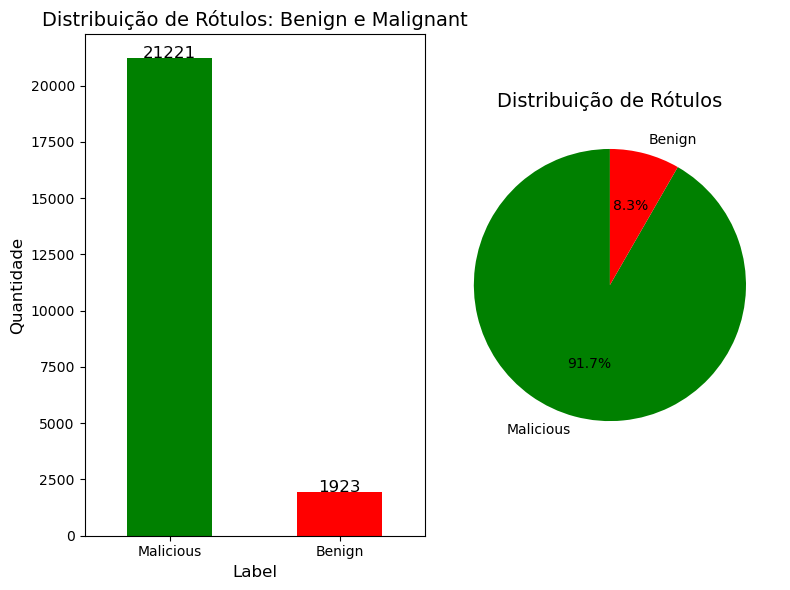

In [51]:
import matplotlib.pyplot as plt

# Contar a quantidade de cada tipo de 'label'
label_counts = df['label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Rótulos: Benign e Malignant', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribuição de Rótulos', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

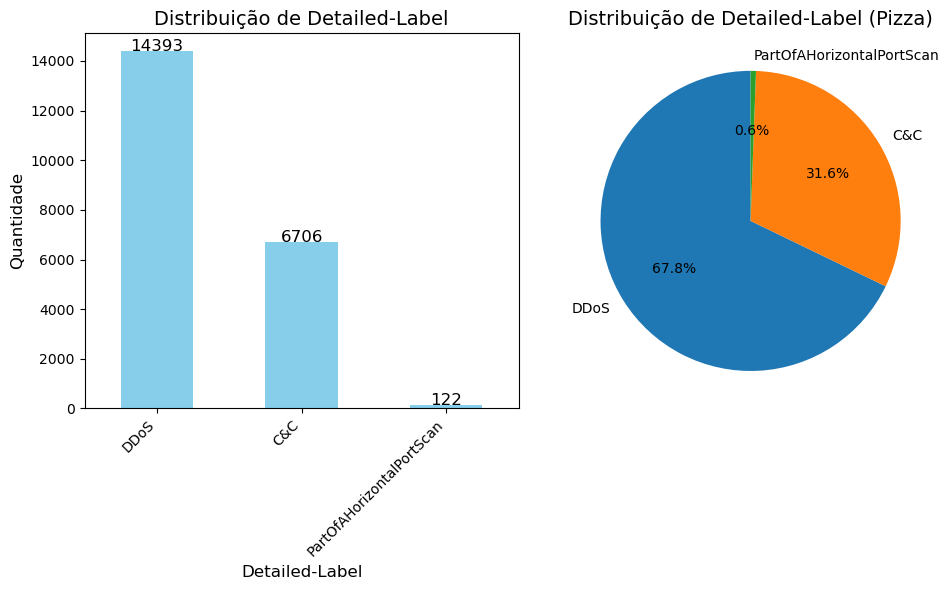

In [52]:
# Filtrar valores indesejados
df_filtered = df[df['detailed-label'] != '-']

# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df_filtered['detailed-label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts, labels=detailed_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label (Pizza)', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

detailed-label
C&C                          6706
DDoS                         5757
-                            1923
PartOfAHorizontalPortScan     122
Name: count, dtype: int64


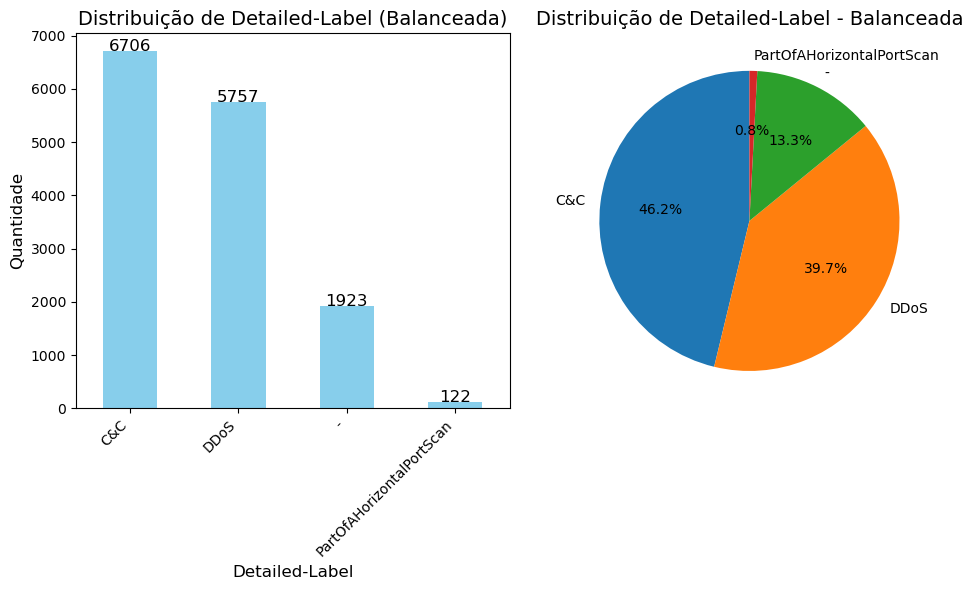

In [53]:
# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df['detailed-label'].value_counts()

# Verificar a quantidade da classe majoritária (DDoS)
ddos_count = detailed_label_counts['DDoS']

# Verificar a quantidade de dados da classe minoritária
minority_class_size = len(df[df['detailed-label'] != 'DDoS'])

# Definir o percentual de redução da classe DDoS
percentage_reduction = 0.6 # Exemplo: reduzir 50% da classe DDoS

# Calcular o número de amostras a serem mantidas na classe DDoS
ddos_undersample_size = int(ddos_count * (1 - percentage_reduction))

# Realizar undersampling na classe DDoS para a quantidade calculada
df_ddos_undersampled = df[df['detailed-label'] == 'DDoS'].sample(ddos_undersample_size, random_state=42)

# Manter a parte dos dados que não são DDoS
df_other = df[df['detailed-label'] != 'DDoS']

# Concatenar as duas partes balanceadas
df_balanced = pd.concat([df_ddos_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['detailed-label'].value_counts())

# Mostrar gráficos novamente para verificar a distribuição balanceada
detailed_label_counts_balanced = df_balanced['detailed-label'].value_counts()

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label (Balanceada)', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts_balanced):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts_balanced, labels=detailed_label_counts_balanced.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label - Balanceada', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

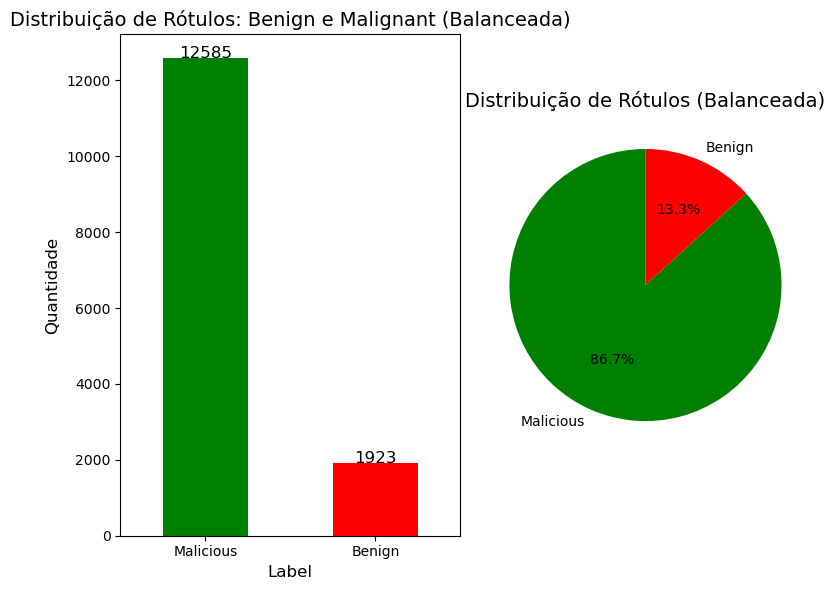

In [54]:
import matplotlib.pyplot as plt

# Contar a quantidade de cada tipo de 'label'
label_counts = df_balanced['label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Rótulos: Benign e Malignant (Balanceada)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribuição de Rótulos (Balanceada)', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


label
Malicious    3860
Benign       1923
Name: count, dtype: int64


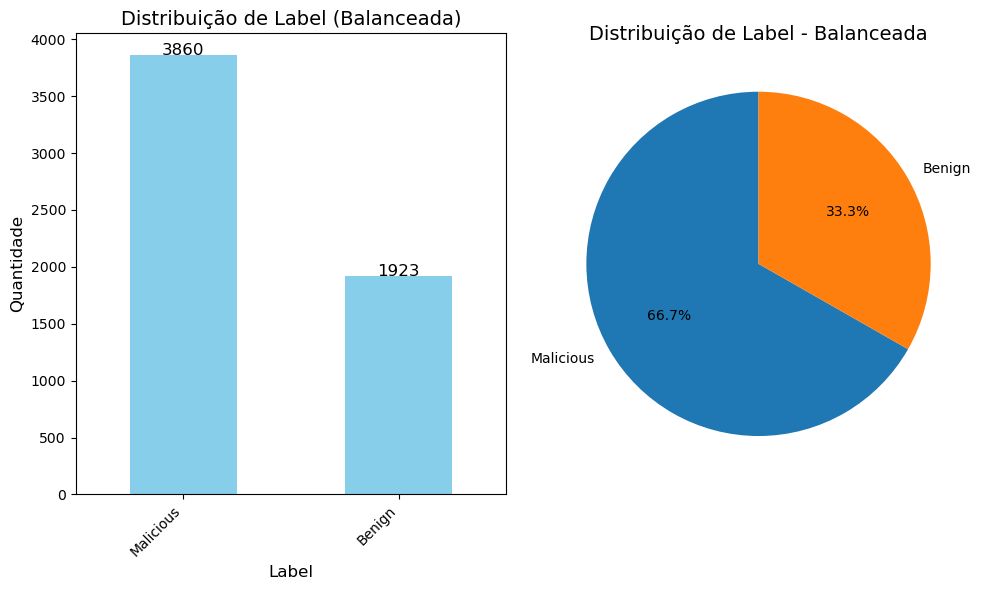

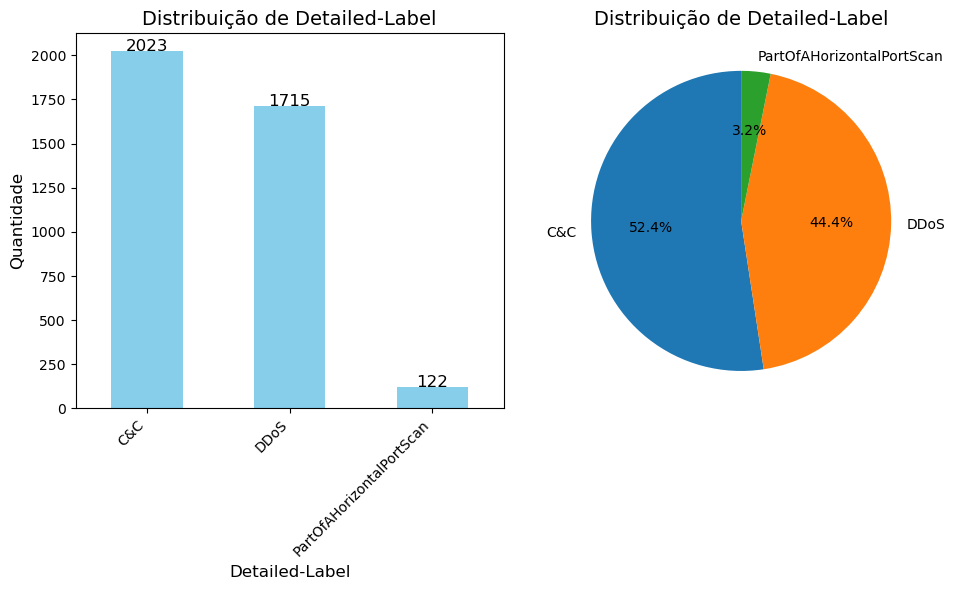

In [55]:
# Contar a quantidade de cada tipo de 'label'
detailed_label_counts = df_balanced['label'].value_counts()

# Verificar a quantidade da classe majoritária (Malicious)
malicious_count = detailed_label_counts['Malicious']

# Verificar a quantidade de dados da classe minoritária (Benign)
benign_count = detailed_label_counts['Benign']

# Definir o percentual de redução da classe Malicious
percentage_reduction_malicious = 0.7  # Exemplo: reduzir 70% da classe Malicious

# Dividir os dados da classe Malicious em duas partes:
# 1. Parte com detailed_label = 'PartOfAHorizontalPortScan'
df_malicious_partscan = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                    (df_balanced['detailed-label'] == 'PartOfAHorizontalPortScan')]

# 2. Parte restante da classe Malicious (sem 'PartOfAHorizontalPortScan')
df_malicious_others = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                   (df_balanced['detailed-label'] != 'PartOfAHorizontalPortScan')]

# Calcular o número de amostras a serem mantidas na parte restante da classe Malicious
malicious_undersample_size = int(df_malicious_others.shape[0] * (1 - percentage_reduction_malicious))

# Realizar undersampling na parte restante da classe Malicious
df_malicious_undersampled = df_malicious_others.sample(malicious_undersample_size, random_state=42)

# Manter a parte dos dados que não são Malicious
df_other = df_balanced[df_balanced['label'] != 'Malicious']

# Concatenar a parte não alterada de 'PartOfAHorizontalPortScan', 
# a parte reduzida de Malicious e os dados de outras classes
df_balanced = pd.concat([df_malicious_partscan, df_malicious_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['label'].value_counts())

# Mostrar gráficos novamente para verificar a distribuição balanceada
detailed_label_counts_balanced = df_balanced['label'].value_counts()

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Label (Balanceada)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts_balanced):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts_balanced, labels=detailed_label_counts_balanced.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Label - Balanceada', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Contar a quantidade de cada tipo de 'detailed-label'
df_filtered = df_balanced[df_balanced['detailed-label'] != '-']
detailed_label_counts = df_filtered['detailed-label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts, labels=detailed_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Columns with only missing values: ['local_orig']
detailed-label
C&C                          6706
DDoS                         5757
-                            1923
PartOfAHorizontalPortScan     122
Name: count, dtype: int64
label
Malicious    3860
Benign       1923
Name: count, dtype: int64
detailed-label
C&C                          2023
-                            1923
DDoS                         1715
PartOfAHorizontalPortScan     122
Name: count, dtype: int64


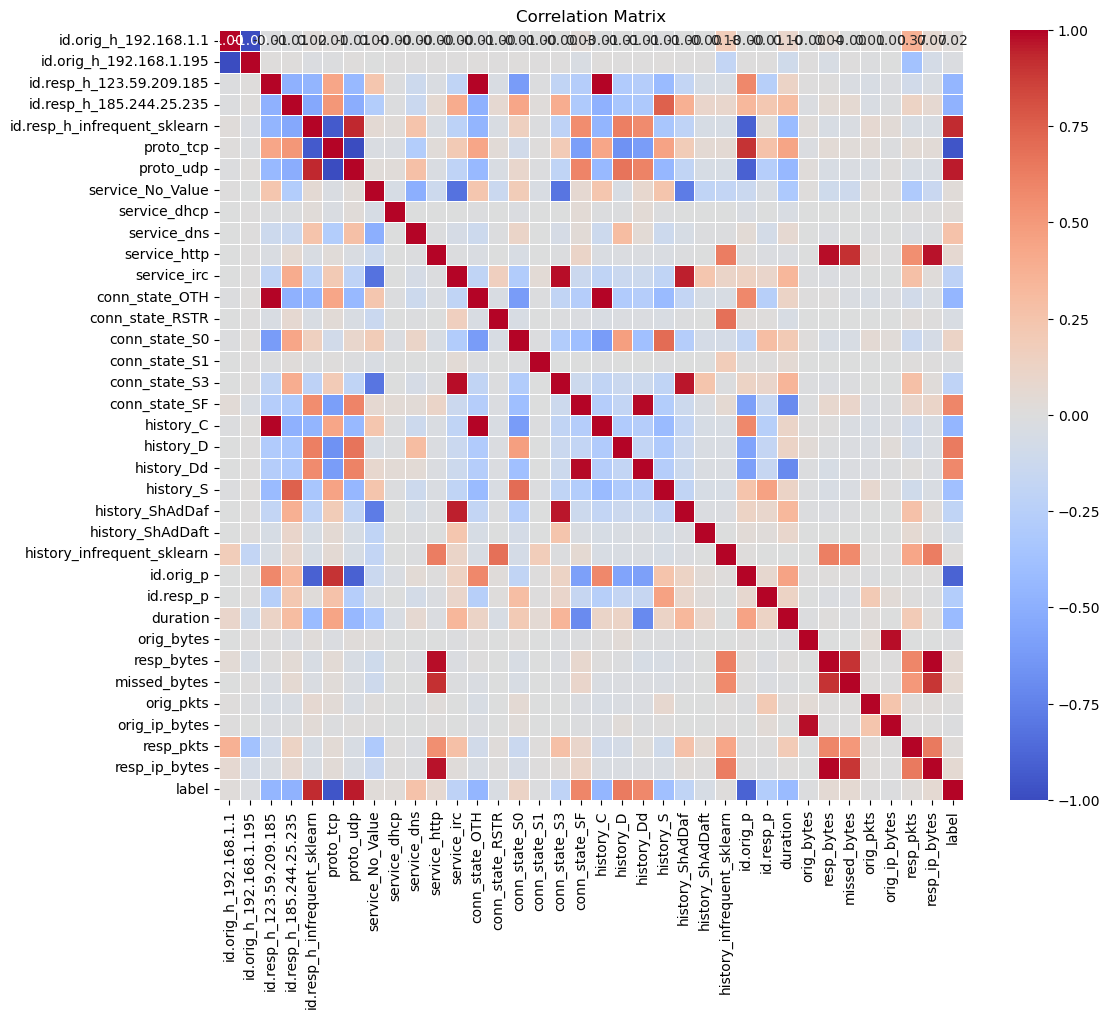

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the file path
file_path = '../Data_files/conn.log.labeled'

# Manually define the expected column names
column_names = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
    "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
    "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
    "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

# Read the file
df = pd.read_csv(
    file_path,
    sep="\t",  # Separator is tab
    comment="#",  # Skip lines starting with '#'
    header=None,  # No header in data section
    skip_blank_lines=True  # Avoid blank lines
)

# Add placeholder columns if fewer than expected
while df.shape[1] < len(column_names):
    df[df.shape[1]] = "-"

# Assign column names
df.columns = column_names

# Replace `-` with NaN for better handling of missing data
df.replace("-", pd.NA, inplace=True)

# Check which columns have only NaN values
all_na_columns = df.columns[df.isna().all()].tolist()
print(f"Columns with only missing values: {all_na_columns}")

# Optionally drop columns with only NaN
df.drop(columns=all_na_columns, inplace=True)

# Handle 'tunnel_parents' column to split space-separated values
df[['tunnel_parents', 'label', 'detailed-label']] = df['tunnel_parents'].str.split(r'\s+', n=2, expand=True)

# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df['detailed-label'].value_counts()

# Verificar a quantidade da classe majoritária (DDoS)
ddos_count = detailed_label_counts['DDoS']

# Verificar a quantidade de dados da classe minoritária
minority_class_size = len(df[df['detailed-label'] != 'DDoS'])

# Definir o percentual de redução da classe DDoS
percentage_reduction = 0.6 # Exemplo: reduzir 60% da classe DDoS

# Calcular o número de amostras a serem mantidas na classe DDoS
ddos_undersample_size = int(ddos_count * (1 - percentage_reduction))

# Realizar undersampling na classe DDoS para a quantidade calculada
df_ddos_undersampled = df[df['detailed-label'] == 'DDoS'].sample(ddos_undersample_size, random_state=42)

# Manter a parte dos dados que não são DDoS
df_other = df[df['detailed-label'] != 'DDoS']

# Concatenar as duas partes balanceadas
df_balanced = pd.concat([df_ddos_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['detailed-label'].value_counts())

# Contar a quantidade de cada tipo de 'label'
detailed_label_counts = df_balanced['label'].value_counts()

# Verificar a quantidade da classe majoritária (Malicious)
malicious_count = detailed_label_counts['Malicious']

# Verificar a quantidade de dados da classe minoritária (Benign)
benign_count = detailed_label_counts['Benign']

# Definir o percentual de redução da classe Malicious
percentage_reduction_malicious = 0.7  # Exemplo: reduzir 70% da classe Malicious

# Dividir os dados da classe Malicious em duas partes:
# 1. Parte com detailed_label = 'PartOfAHorizontalPortScan'
df_malicious_partscan = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                    (df_balanced['detailed-label'] == 'PartOfAHorizontalPortScan')]

# 2. Parte restante da classe Malicious (sem 'PartOfAHorizontalPortScan')
df_malicious_others = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                   (df_balanced['detailed-label'] != 'PartOfAHorizontalPortScan')]

# Calcular o número de amostras a serem mantidas na parte restante da classe Malicious
malicious_undersample_size = int(df_malicious_others.shape[0] * (1 - percentage_reduction_malicious))

# Realizar undersampling na parte restante da classe Malicious
df_malicious_undersampled = df_malicious_others.sample(malicious_undersample_size, random_state=42)

# Manter a parte dos dados que não são Malicious
df_other = df_balanced[df_balanced['label'] != 'Malicious']

# Concatenar a parte não alterada de 'PartOfAHorizontalPortScan', 
# a parte reduzida de Malicious e os dados de outras classes
df_balanced = pd.concat([df_malicious_partscan, df_malicious_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['label'].value_counts())

# Mostrar gráficos novamente para verificar a distribuição balanceada
detailed_label_counts_balanced = df_balanced['label'].value_counts()
print(df_balanced['detailed-label'].value_counts())

df_balanced.drop(columns=['ts','uid','detailed-label','tunnel_parents'], inplace=True)

df_balanced['label'] = df_balanced['label'].replace({'Malicious': 0, 'Benign': 1})






# Replace <NA> with np.nan in 'duration' column
df_balanced['duration'] = df_balanced['duration'].replace({pd.NA: np.nan})

# Step 1: Impute missing values in the 'duration' column (impute before transformation)
imputer = SimpleImputer(strategy='median')
df_balanced['duration'] = imputer.fit_transform(df_balanced[['duration']])

# Step 2: Apply the log transformation to the 'duration' column
df_balanced['duration'] = df_balanced['duration'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

# Step 3: Standardize the 'duration' column
scaler = StandardScaler()
df_balanced['duration'] = scaler.fit_transform(df_balanced[['duration']])





columns_to_encode = ['id.orig_h', 'id.resp_h', 'proto', 'service', 'conn_state', 'history']

# Substitui valores NA por 'No_Value'
df_balanced[columns_to_encode] = df_balanced[columns_to_encode].replace({pd.NA: 'No_Value'})

# Inicializa um DataFrame para os dados codificados
encoded_columns_df = pd.DataFrame()

for column in columns_to_encode:
    if column == 'id.resp_h':
        # Usa OneHotEncoder com max_categories=3 para 'id.resp_h'
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=3)
    else:
        # Usa o OneHotEncoder padrão para outras colunas
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=7)
    
    # Aplica o encoder na coluna
    encoded_column = encoder.fit_transform(df_balanced[[column]])
    
    # Converte a coluna codificada para DataFrame
    encoded_df = pd.DataFrame(
        encoded_column, 
        columns=encoder.get_feature_names_out([column])
    )
    
    # Concatena com o DataFrame de dados codificados
    encoded_columns_df = pd.concat([encoded_columns_df, encoded_df], axis=1)

# Concatena as colunas codificadas no DataFrame original
df_balanced_encoded = pd.concat([encoded_columns_df, df_balanced], axis=1)

# Remove as colunas originais
df_balanced_encoded.drop(columns=columns_to_encode, inplace=True)







# Ensure columns are numeric before filling NaNs
df_balanced_encoded['orig_bytes'] = pd.to_numeric(df_balanced_encoded['orig_bytes'], errors='coerce')
df_balanced_encoded['resp_bytes'] = pd.to_numeric(df_balanced_encoded['resp_bytes'], errors='coerce')

# Fill missing values with mean for numeric columns (assigning back to the column)
df_balanced_encoded['orig_bytes'] = df_balanced_encoded['orig_bytes'].fillna(df_balanced_encoded['orig_bytes'].mean())
df_balanced_encoded['resp_bytes'] = df_balanced_encoded['resp_bytes'].fillna(df_balanced_encoded['resp_bytes'].mean())

# For categorical columns, use the mode instead (assigning back to the column)
df_balanced_encoded['local_resp'] = df_balanced_encoded['local_resp'].fillna(df_balanced_encoded['local_resp'].mode()[0])
df_balanced_encoded['label'] = df_balanced_encoded['label'].fillna(df_balanced_encoded['label'].mode()[0])

# Calculate the mode of the 'missed_bytes' column
mode_value = df_balanced_encoded['missed_bytes'].mode()[0]

# Replace 'C' with the mode value
df_balanced_encoded['missed_bytes'] = df_balanced_encoded['missed_bytes'].replace('C', mode_value)


#Remove row with column "resp_ip_bytes" = "-   Malicious   DDoS"
df_balanced_encoded = df_balanced_encoded[df_balanced_encoded['resp_ip_bytes'] != '-   Malicious   DDoS']

#remove columns all zero columns
columns_to_remove = [col for col in df_balanced_encoded.columns if df_balanced_encoded[col].nunique() <= 1]
df_balanced_encoded = df_balanced_encoded.drop(columns=columns_to_remove)



# Now, calculate the correlation matrix again
correlation_matrix = df_balanced_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

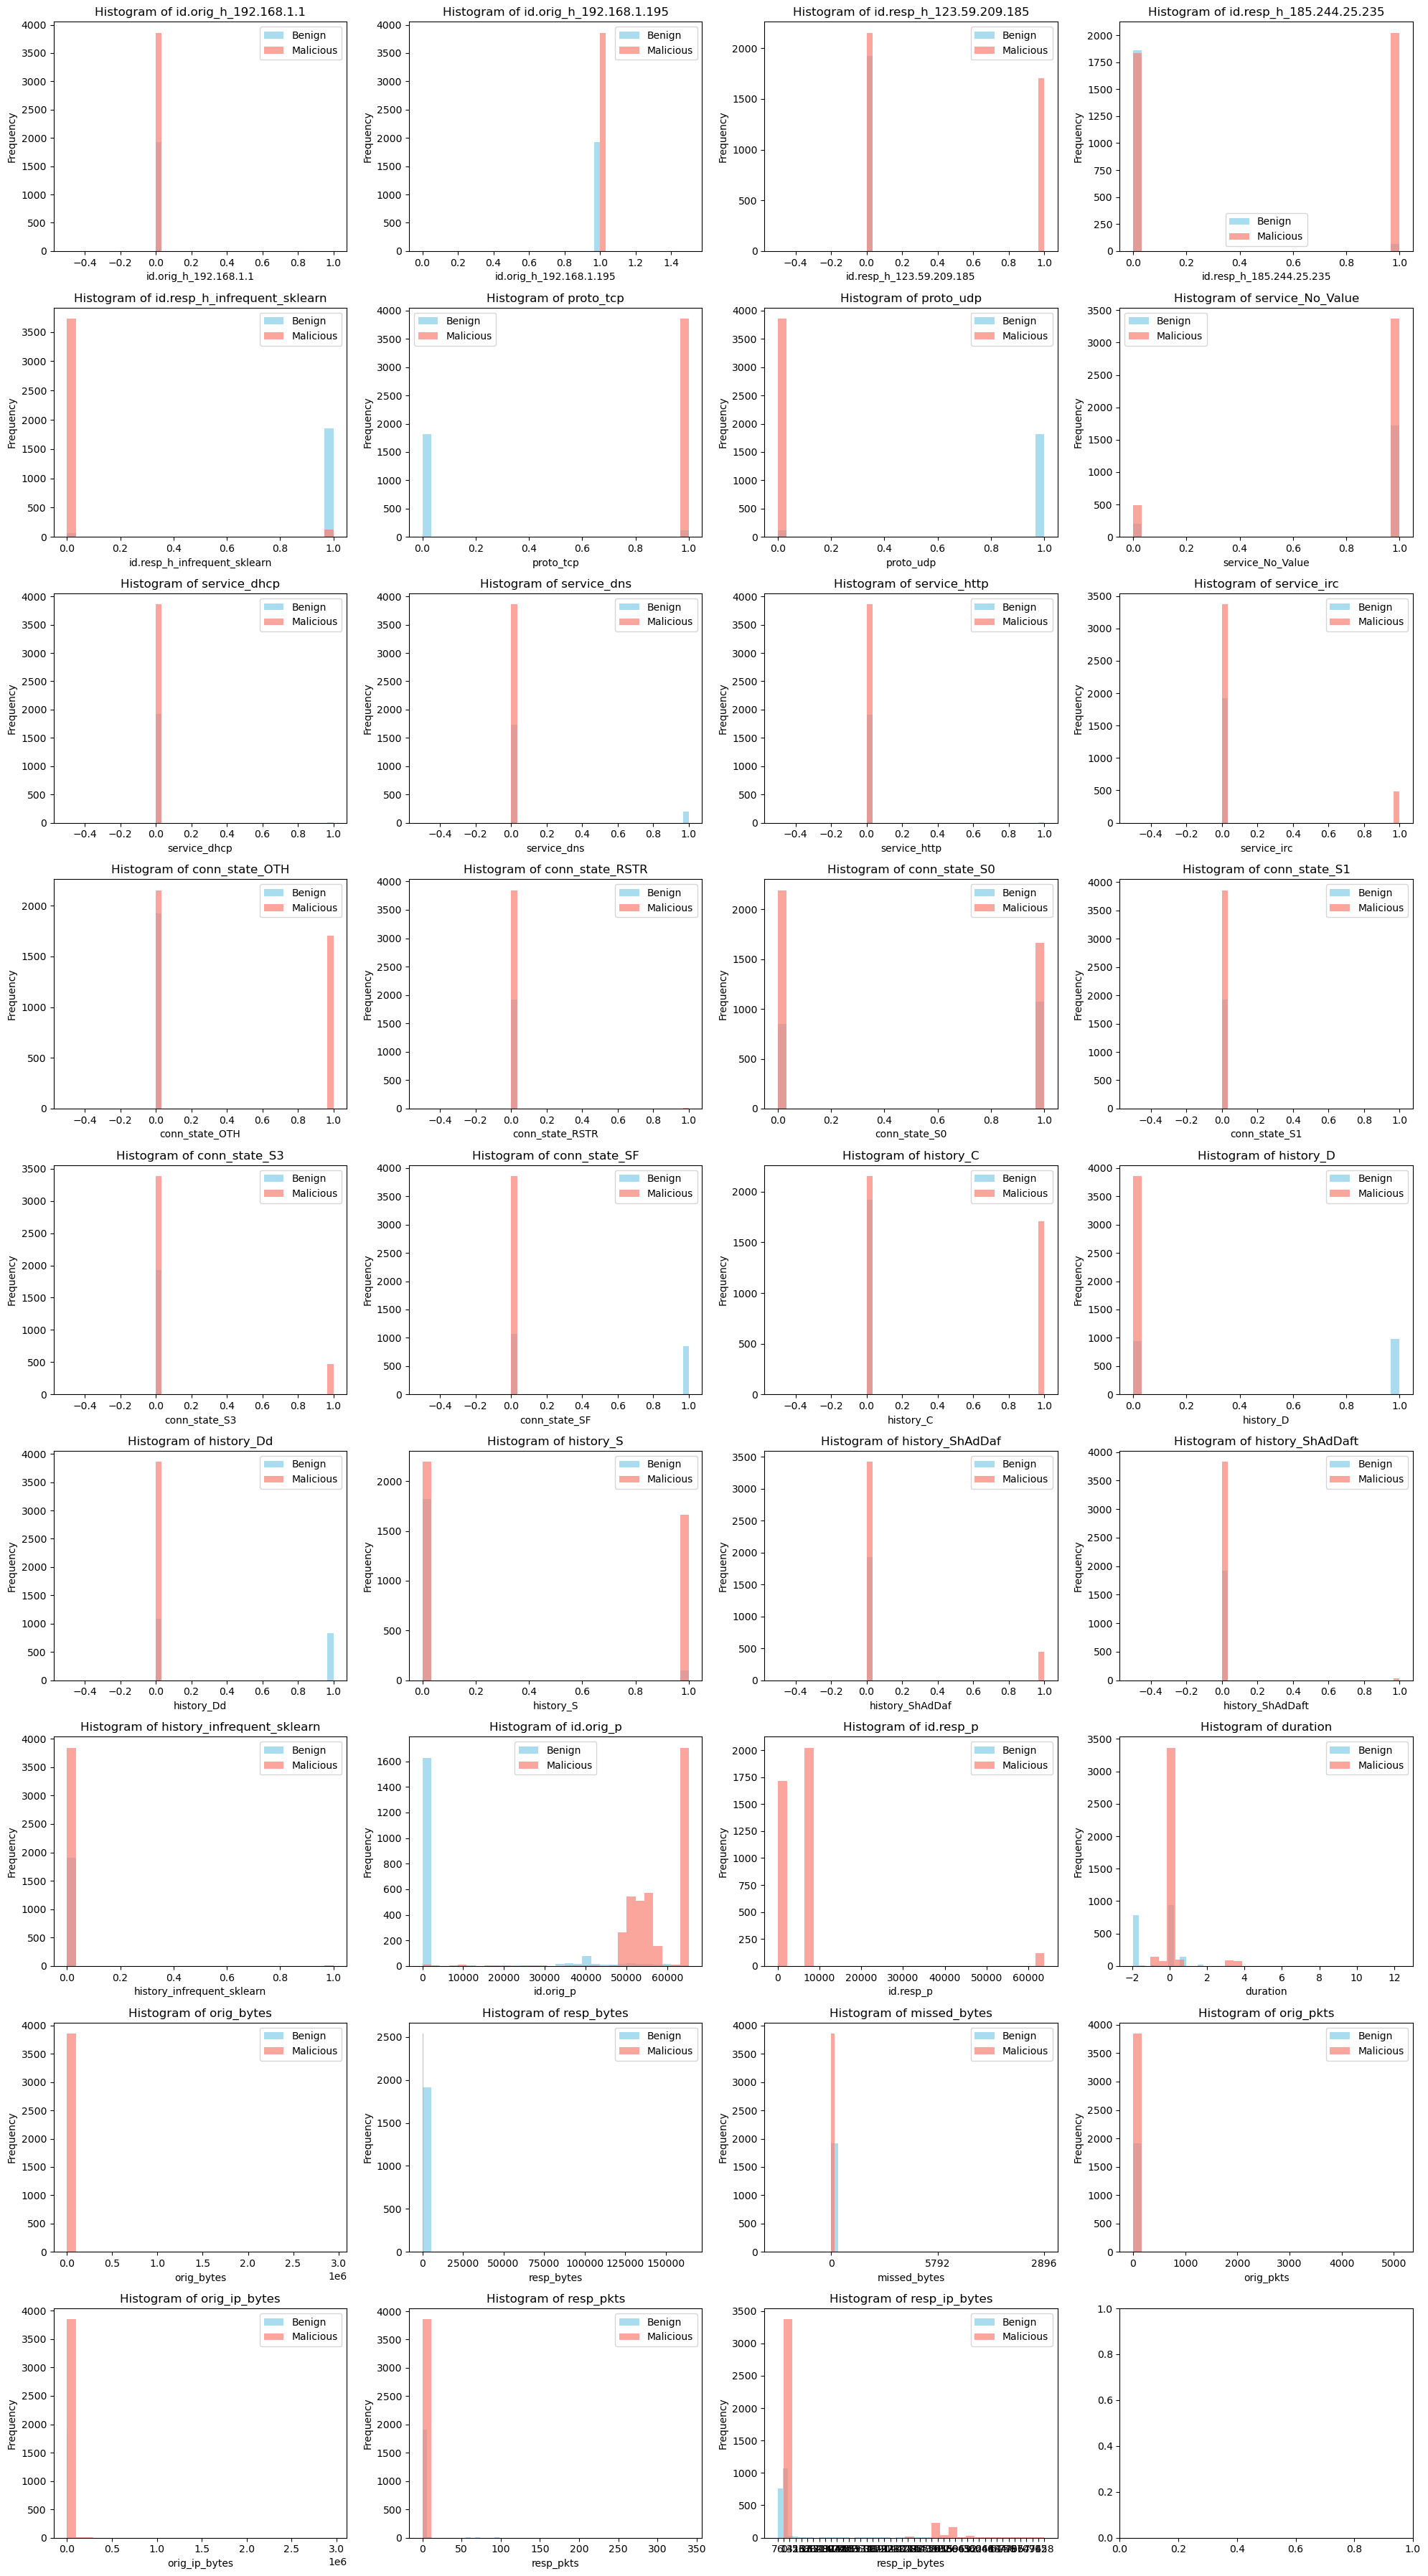

In [61]:
# Define colors for the classes
colors = {'Benign': 'skyblue', 'Malicious': 'salmon'}

# Number of columns for the subplot grid
num_columns = 4

# Calculate the number of rows needed
num_features = len(df_balanced_encoded.columns) - 1  # Exclude 'label'
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
axes = axes.flatten()

# Loop through each numeric column and create histograms
for i, column in enumerate(df_balanced_encoded.columns):
    if column != 'label':  # Skip the label column for numeric histograms
        # Get data for benign and malicious classes
        benign_values = df_balanced_encoded[df_balanced_encoded['label'] == 1][column]
        malicious_values = df_balanced_encoded[df_balanced_encoded['label'] == 0][column]

        # Plot histograms
        axes[i].hist(benign_values, bins=30, alpha=0.7, label='Benign', color=colors['Benign'])
        axes[i].hist(malicious_values, bins=30, alpha=0.7, label='Malicious', color=colors['Malicious'])

        # Add title and labels
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

        # Add legend
        axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show
plt.tight_layout()
plt.show()

/tmp/ipykernel_12910/1366938808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['label'] = temp_df['label'].map({1: 'Benign', 0: 'Malicious'})
/tmp/ipykernel_12910/1366938808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['label'] = temp_df['label'].map({1: 'Benign', 0: 'Malicious'})
/tmp/ipykernel_12910/1366938808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

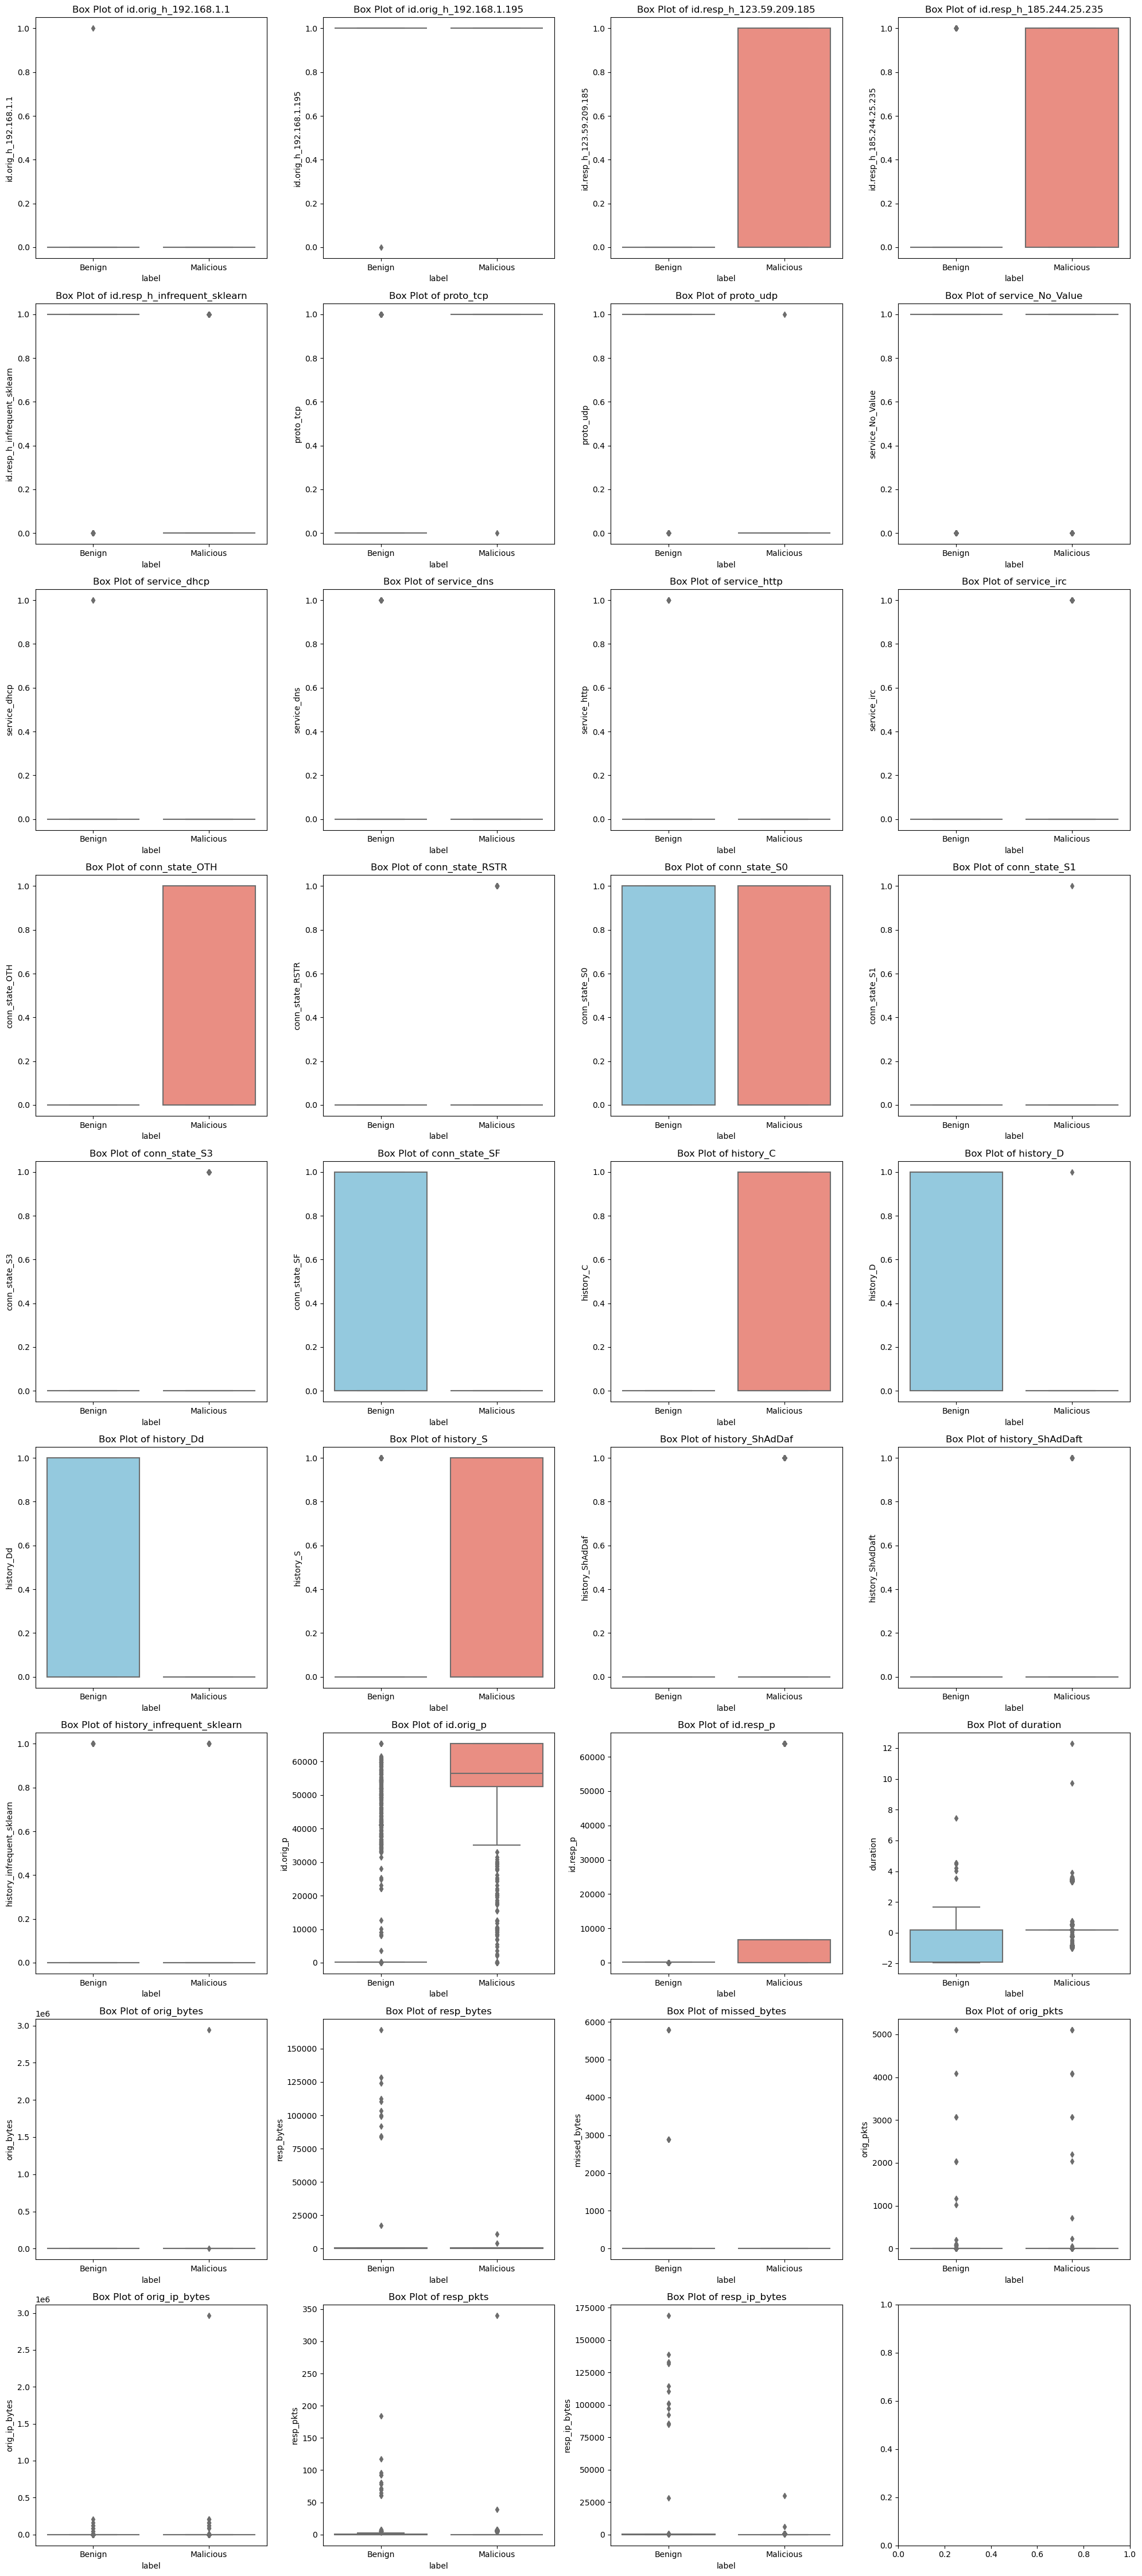

In [63]:
# Ensure all columns except 'label' are numeric
df_balanced_encoded = df_balanced_encoded.apply(pd.to_numeric, errors='coerce')

# Number of columns for the subplot grid
num_columns = 4

# Calculate the number of rows needed
num_features = len(df_balanced_encoded.columns) - 1  # Exclude 'label'
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Loop through each numeric column and create box plots
for i, column in enumerate(df_balanced_encoded.columns):
    if column != 'label':  # Skip the label column for box plots
        # Create a temporary dataframe for plotting
        temp_df = df_balanced_encoded[[column, 'label']]
        temp_df['label'] = temp_df['label'].map({1: 'Benign', 0: 'Malicious'})

        # Plot the box plot
        sns.boxplot(data=temp_df, x='label', y=column, ax=axes[i], palette={'Benign': 'skyblue', 'Malicious': 'salmon'})

        # Add title
        axes[i].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show
plt.tight_layout()
plt.show()